# Exploración y Análisis Inicial del Conjunto de Datos `datosML`
En este *notebook* analizamos estadísticamente y visualizamos las series de aceleración preprocesadas en el paso anterior. Cada bloque de código original se mantiene **idéntico** en su lógica; únicamente se han añadido comentarios explicativos y celdas *Markdown* en español para guiar la lectura y comprensión.

## Bloque 1 – Importación de librerías

In [57]:
# ----------------------------------------------------------------------------------
# BLOQUE 1: Importación de librerías
# ----------------------------------------------------------------------------------
# • `numpy`   : operaciones numéricas.
# • `matplotlib.pyplot` y `seaborn` : visualización.
# • `pandas`  : manipulación tabular.
# • `os`      : utilidades del sistema de archivos.
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Bloque 2 – Verificación de ruta de trabajo

In [58]:
# ----------------------------------------------------------------------------------
# BLOQUE 2: Asegura que estamos en la carpeta raíz del proyecto
# ----------------------------------------------------------------------------------
if not os.path.basename(os.getcwd()) == 'Seismic-Multilabel-Event-Classifier':
    os.chdir('..')
    print(f"Changed directory to {os.getcwd()}")

## Bloque 3 – Carga del dataset

In [59]:
# ----------------------------------------------------------------------------------
# BLOQUE 3: Lectura del archivo `datosML.json`
# ----------------------------------------------------------------------------------
df = pd.read_json('data/interim/datosML.json', lines=True)

## Bloque 4 – Vista rápida de los datos

In [60]:
# ----------------------------------------------------------------------------------
# BLOQUE 4: Primer vistazo con `head()`
# ----------------------------------------------------------------------------------
df.head()

,Archivo,NPTS,Falla,Mag,Vs,Time,AccV,AccH2,AccH1
0,RSN8478_PARK2004,32169,1 Stiker Slip (SS),4-6,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[3.34e-08, 3.3700000000000004e-08, 3.39e-08, 3...","[-5.5800000000000003e-08, -5.65e-08, -5.730000...","[-1.93e-08, -1.93e-08, -1.93e-08, -1.93e-08, -..."
1,RSN8700_40204628,20001,1 Stiker Slip (SS),4-6,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8.5e-09, 8.9e-09, 9.2e-09, 9.5e-09, 9.7000000...","[-2.2000000000000003e-09, -2.3e-09, -2.4e-09, ...","[8e-10, 1.2e-09, 1.6e-09, 2e-09, 2.4e-09, 2.80..."
2,RSN8459_PARK2004,32380,1 Stiker Slip (SS),4-6,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[5.86e-08, 5.94e-08, 6.02e-08, 6.1e-08, 6.17e-...","[2.7200000000000002e-08, 2.7e-08, 2.6800000000...","[1.5000000000000002e-08, 1.4900000000000001e-0..."
3,RSN2148_BEARCTY,8200,1 Stiker Slip (SS),4-6,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-2.27684e-05, -2.11897e-05, -2.81075e-05, 1.7...","[7.438800000000001e-06, 5.522000000000001e-06,...","[1.0019400000000001e-05, 9.6351e-06, 1.25398e-..."
4,RSN8426_BEARCTY,14465,1 Stiker Slip (SS),4-6,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[3.1e-09, 3.1e-09, 3.1e-09, 3.1e-09, 3.1e-09, ...","[4e-10, 4e-10, 4e-10, 4e-10, 4e-10, 4e-10, 4e-...","[2.9e-09, 2.9e-09, 2.9e-09, 2.9e-09, 2.8000000..."


## Bloque 5 – Vista final de los datos

In [61]:
# ----------------------------------------------------------------------------------
# BLOQUE 5: Últimas filas con `tail()`
# ----------------------------------------------------------------------------------
df.tail()

,Archivo,NPTS,Falla,Mag,Vs,Time,AccV,AccH2,AccH1
1691,RSN1517_CHICHI,18000,3 Reverse-Oblique,6-8,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-8.400660000000001e-05, -8.45768e-05, -8.5119...","[0.0002767672, 0.0002792084, 0.0002816084, 0.0...","[-6.22572e-05, -6.816480000000001e-05, -7.3915..."
1692,RSN572_SMART1.45,3300,3 Reverse-Oblique,6-8,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.0001424588, 0.0001419751, 0.0001417782, 0.0...","[0.00016119230000000002, 0.0001602155000000000...","[-0.0003663687, -0.0003637901, -0.0003617044, ..."
1693,RSN1448_CHICHI,21250,3 Reverse-Oblique,6-8,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-5.6375e-06, -5.647900000000001e-06, -5.6516e...","[-2.6508e-06, -2.6349e-06, -2.6208e-06, -2.611...","[2.69202e-05, 2.6857700000000002e-05, 2.67979e..."
1694,RSN1444_CHICHI,16250,3 Reverse-Oblique,6-8,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.1231600000000001e-05, -1.11905e-05, -1.114...","[3.06443e-05, 3.0534500000000004e-05, 3.04283e...","[2.1149e-05, 2.112e-05, 2.1094200000000002e-05..."
1695,RSN1340_CHICHI,13401,3 Reverse-Oblique,6-8,600-,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[3.14942e-05, 3.14354e-05, 3.1372100000000004e...","[1.16185e-05, 1.1695200000000001e-05, 1.177240...","[2.087e-06, 2.1153e-06, 2.1454000000000002e-06..."


## Bloque 6 – Información general del DataFrame

In [62]:
# ----------------------------------------------------------------------------------
# BLOQUE 6: Resumen de columnas y tipos con `info()`
# ----------------------------------------------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Archivo  1696 non-null   object
 1   NPTS     1696 non-null   int64 
 2   Falla    1696 non-null   object
 3   Mag      1696 non-null   object
 4   Vs       1696 non-null   object
 5   Time     1696 non-null   object
 6   AccV     1696 non-null   object
 7   AccH2    1696 non-null   object
 8   AccH1    1696 non-null   object
dtypes: int64(1), object(8)
memory usage: 119.4+ KB


## Bloque 7 – Verificar tipos de columnas numéricas de series

In [63]:
# ----------------------------------------------------------------------------------
# BLOQUE 7: Confirmamos que los campos que almacenan arrays se leen como `list`
# ----------------------------------------------------------------------------------
print(type(df['Time'].iloc[0]))
print(type(df['AccV'].iloc[0]))
print(type(df['AccH1'].iloc[0]))
print(type(df['AccH2'].iloc[0]))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


## Bloque 8 – Conversión de listas a `numpy.ndarray`

In [64]:
# ----------------------------------------------------------------------------------
# BLOQUE 8: Convertimos las listas a arrays `numpy` para acelerar operaciones vectoriales
# ----------------------------------------------------------------------------------
for col in ['Time', 'AccV', 'AccH1', 'AccH2']:
    df[col] = df[col].apply(lambda x: np.array(x, dtype=np.float32))

## Bloque 9 – Verificación de tipos después de la conversión

In [65]:
# ----------------------------------------------------------------------------------
# BLOQUE 9: Revisamos nuevamente `info()` para confirmar los cambios
# ----------------------------------------------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Archivo  1696 non-null   object
 1   NPTS     1696 non-null   int64 
 2   Falla    1696 non-null   object
 3   Mag      1696 non-null   object
 4   Vs       1696 non-null   object
 5   Time     1696 non-null   object
 6   AccV     1696 non-null   object
 7   AccH2    1696 non-null   object
 8   AccH1    1696 non-null   object
dtypes: int64(1), object(8)
memory usage: 119.4+ KB


## Bloque 10 – Búsqueda de valores nulos

In [66]:
# ----------------------------------------------------------------------------------
# BLOQUE 10: Conteo de valores ausentes
# ----------------------------------------------------------------------------------
df.isna().sum()

Archivo    0
NPTS       0
Falla      0
Mag        0
Vs         0
Time       0
AccV       0
AccH2      0
AccH1      0
dtype: int64

## Bloque 11 – Estadísticas de `NPTS`

In [ ]:
# ----------------------------------------------------------------------------------
# BLOQUE 11: Estadísticas descriptivas del número de puntos por registro
# ----------------------------------------------------------------------------------
df[['NPTS']].describe().T

,count,mean,std,min,25%,50%,75%,max
NPTS,1696.0,10419.130896,7915.915027,366.0,4699.5,8000.0,14400.0,65500.0


## Bloque 12 – Distribución de categorías

In [68]:
# ----------------------------------------------------------------------------------
# BLOQUE 12: Conteo de valores por categoría (`Falla`, `Mag`, `Vs`)
# ----------------------------------------------------------------------------------
for c in ['Falla', 'Mag', 'Vs']:
    print(df[c].value_counts())

Falla
3 Reverse-Oblique     692
1 Stiker Slip (SS)    597
2 Normal-Oblique      407
Name: count, dtype: int64
Mag
4-6    942
6-8    754
Name: count, dtype: int64
Vs
400-600    533
200-400    486
600-       476
0-200      201
Name: count, dtype: int64


## Bloque 13 – Longitud de serie temporal

In [69]:
# ----------------------------------------------------------------------------------
# BLOQUE 13: Calculamos `len_Time` (número de muestras) por registro
# ----------------------------------------------------------------------------------
df['len_Time']  = df['Time'].apply(lambda x: len(x))

## Bloque 14 – Estadísticas de `len_Time`

In [70]:
# ----------------------------------------------------------------------------------
# BLOQUE 14: Descripción y distribución de la longitud temporal
# ----------------------------------------------------------------------------------
df['len_Time'].describe().T

count     1696.000000
mean      6561.728774
std       5844.114680
min        300.000000
25%       3001.000000
50%       4379.500000
75%       7298.000000
max      32380.000000
Name: len_Time, dtype: float64

## Bloque 15 – Conteo de las longitudes más frecuentes

In [71]:
# ----------------------------------------------------------------------------------
# BLOQUE 15: Frecuencias de las longitudes de serie temporal
# ----------------------------------------------------------------------------------
df['len_Time'].value_counts().head(10)

len_Time
4000     88
4001     54
5999     47
20001    45
9001     44
6001     41
3001     21
4201     19
6000     19
3999     17
Name: count, dtype: int64

## Bloque 16 – Histograma de `len_Time`

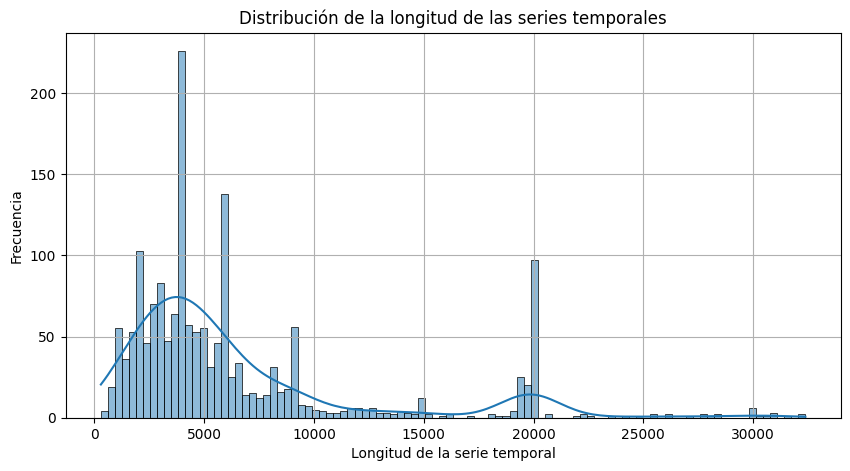

In [72]:
# ----------------------------------------------------------------------------------
# BLOQUE 16: Visualizamos la distribución de `len_Time`
# ----------------------------------------------------------------------------------
# Gráfica
plt.figure(figsize=(10, 5))
sns.histplot(df['len_Time'], bins=100, kde=True)
plt.title('Distribución de la longitud de las series temporales')
plt.xlabel('Longitud de la serie temporal')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

## Bloque 17 – Visualización de muestras aleatorias

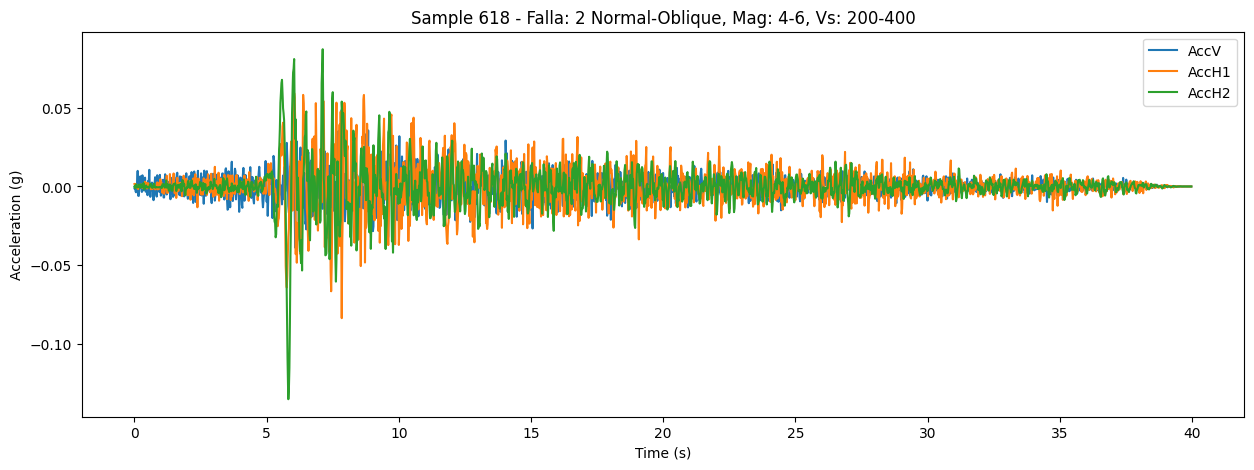

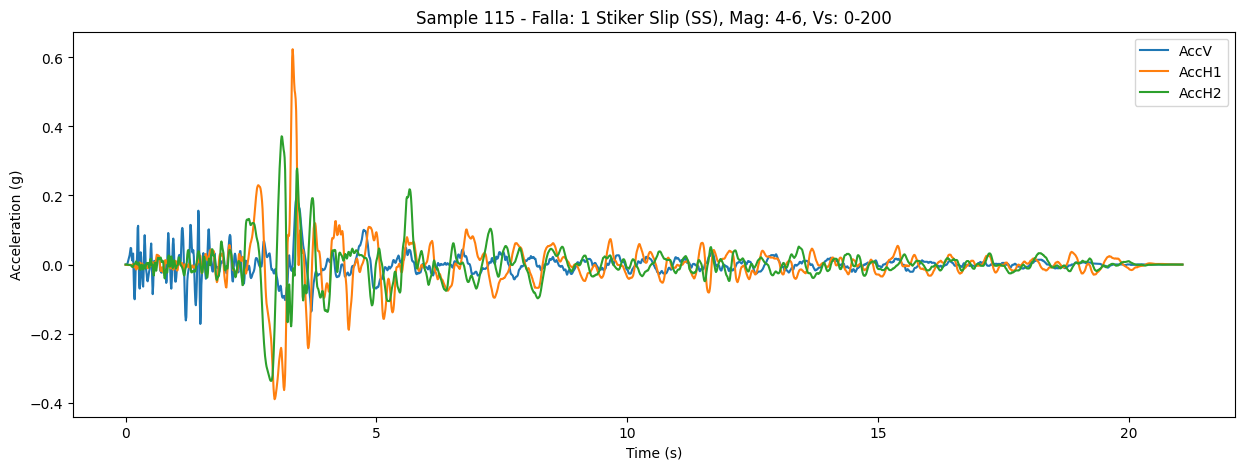

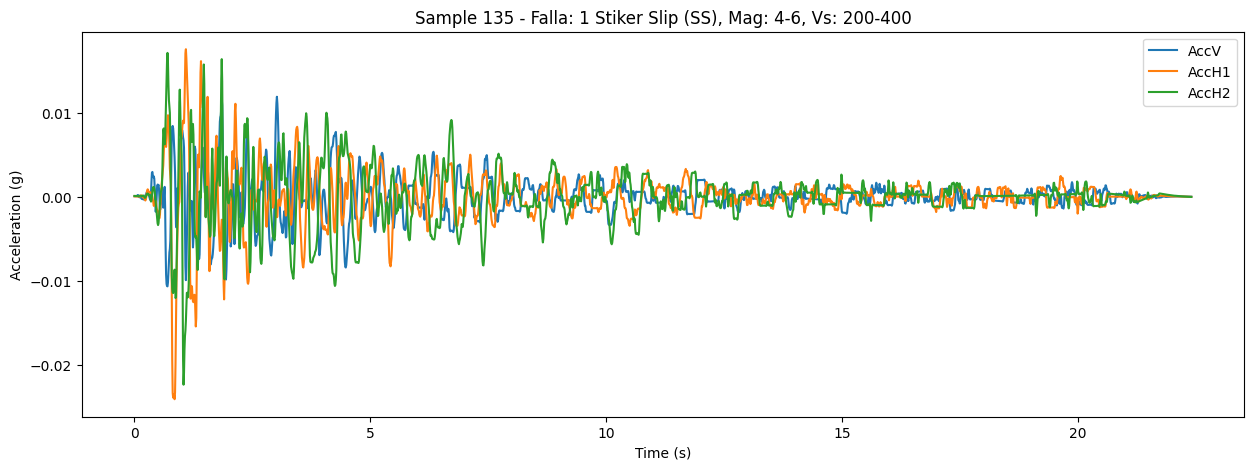

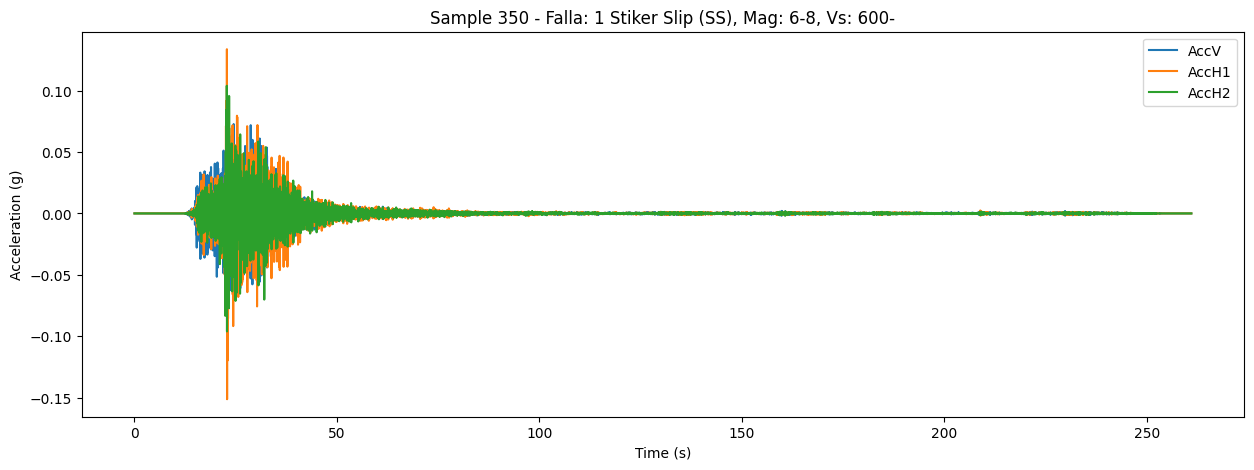

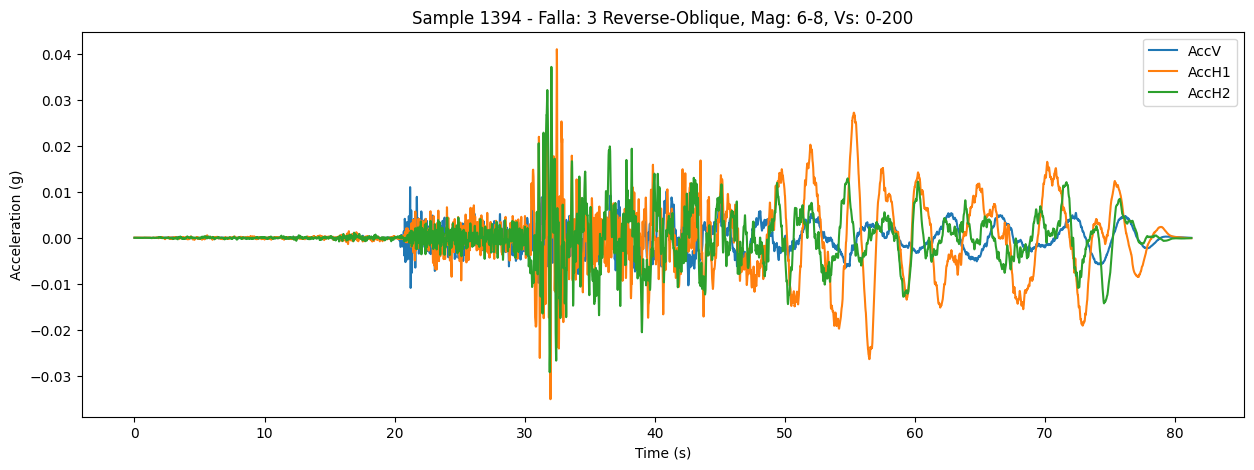

In [73]:
# ----------------------------------------------------------------------------------
# BLOQUE 17: Graficamos 5 registros de ejemplo para ver las tres componentes
# ----------------------------------------------------------------------------------
sample = df.sample(5, random_state=42)
for i, row in sample.iterrows():
    plt.figure(figsize=(15, 5))
    plt.plot(row['Time'], row['AccV'], label='AccV')
    plt.plot(row['Time'], row['AccH1'], label='AccH1')
    plt.plot(row['Time'], row['AccH2'], label='AccH2')
    plt.title(f"Sample {i} - Falla: {row['Falla']}, Mag: {row['Mag']}, Vs: {row['Vs']}")
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (g)')
    plt.legend()
    plt.show()

## Bloque 18 – Extracción de estadísticas de señal

In [74]:
# ----------------------------------------------------------------------------------
# BLOQUE 18: Calculamos máximos, mínimos y RMS de cada componente
# ----------------------------------------------------------------------------------
df['max_AccV'] = df['AccV'].apply(lambda x: np.max(x))
df['min_AccV'] = df['AccV'].apply(lambda x: np.min(x))
df['rms_AccV'] = df['AccV'].apply(lambda x: np.sqrt(np.mean(x**2)))

df['max_AccH1'] = df['AccH1'].apply(lambda x: np.max(x))
df['min_AccH1'] = df['AccH1'].apply(lambda x: np.min(x))
df['rms_AccH1'] = df['AccH1'].apply(lambda x: np.sqrt(np.mean(x**2)))

df['max_AccH2'] = df['AccH2'].apply(lambda x: np.max(x))
df['min_AccH2'] = df['AccH2'].apply(lambda x: np.min(x))
df['rms_AccH2'] = df['AccH2'].apply(lambda x: np.sqrt(np.mean(x**2)))

## Bloque 19 – Función auxiliar para distribuciones

In [75]:
# ----------------------------------------------------------------------------------
# BLOQUE 19: Definimos `plot_distribution` para reutilizar código de gráficos
# ----------------------------------------------------------------------------------
# Función que grafique distribuciones de las características
def plot_distribution(df, col):
    # Diccionario de unidades para algunas columnas conocidas
    unidades = {
        'AccV': 'g',
        'max_AccV': 'g',
        'min_AccV': 'g',
        'rms_AccV': 'g',
        'AccH1': 'g',
        'max_AccH1': 'g',
        'min_AccH1': 'g',
        'rms_AccH1': 'g',
        'AccH2': 'g',
        'max_AccH2': 'g',
        'min_AccH2': 'g',
        'rms_AccH2': 'g',
        'NPTS': 'puntos',
        'Falla': 'categoría',
        'Mag': 'magnitud',
        'Vs': 'velocidad',
        'Time': 's',
        'duration': 's',
        'len_Time': 'puntos'
    }
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(f'{col} ({unidades.get(col, "unidades")})')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()

## Bloque 20 – Distribución de métricas verticales

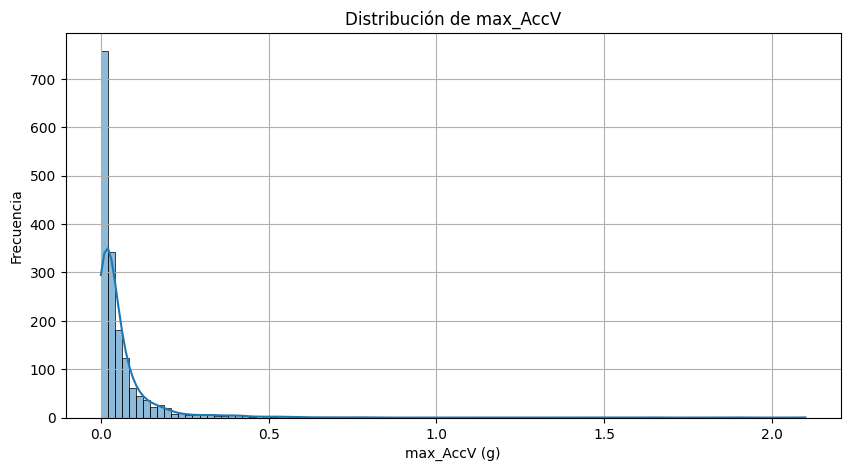

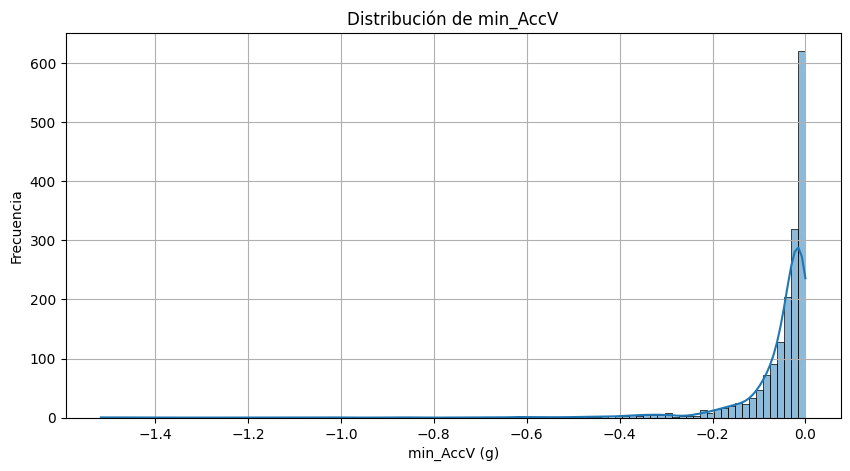

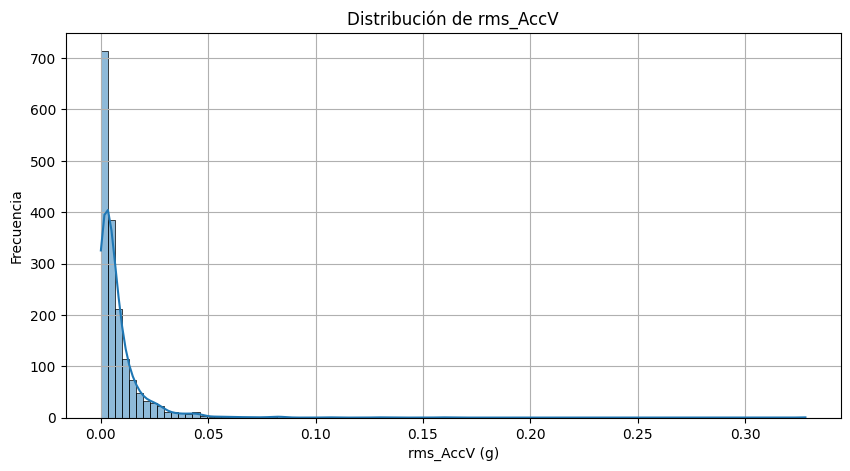

In [76]:
# ----------------------------------------------------------------------------------
# BLOQUE 20: Distribuciones de `AccV`
# ----------------------------------------------------------------------------------
plot_distribution(df, 'max_AccV')
plot_distribution(df, 'min_AccV')
plot_distribution(df, 'rms_AccV')

## Bloque 21 – Distribución de métricas horizontales H1

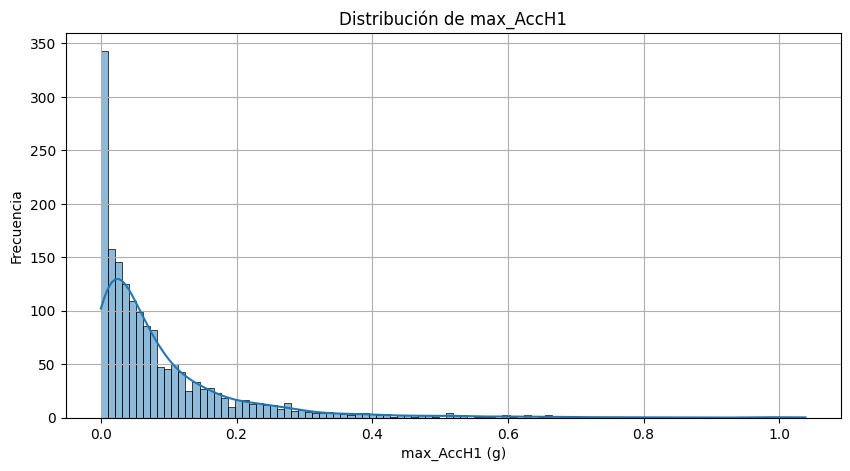

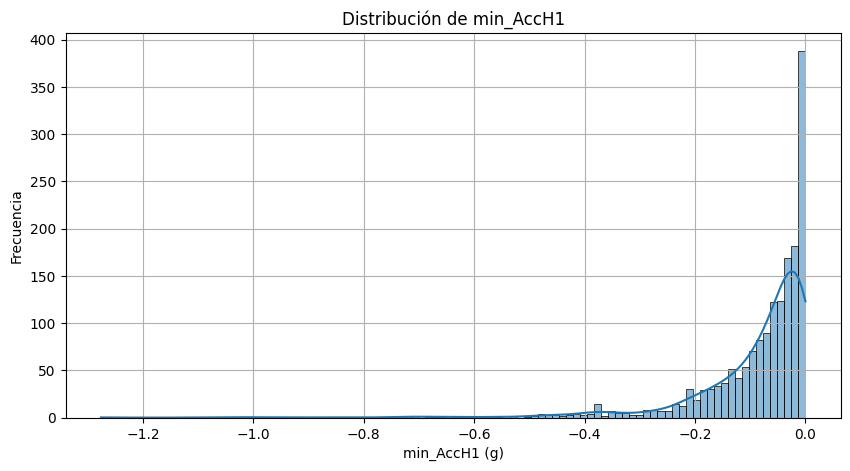

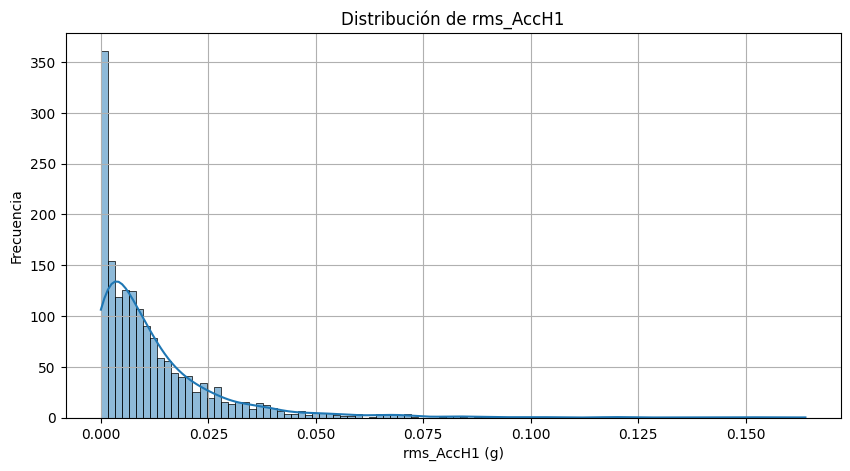

In [77]:
# ----------------------------------------------------------------------------------
# BLOQUE 21: Distribuciones de `AccH1`
# ----------------------------------------------------------------------------------
plot_distribution(df, 'max_AccH1')
plot_distribution(df, 'min_AccH1')
plot_distribution(df, 'rms_AccH1')

## Bloque 22 – Distribución de métricas horizontales H2

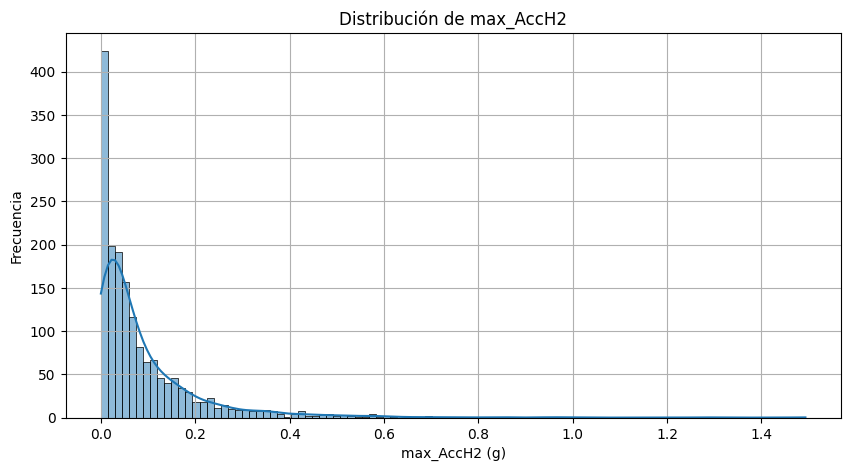

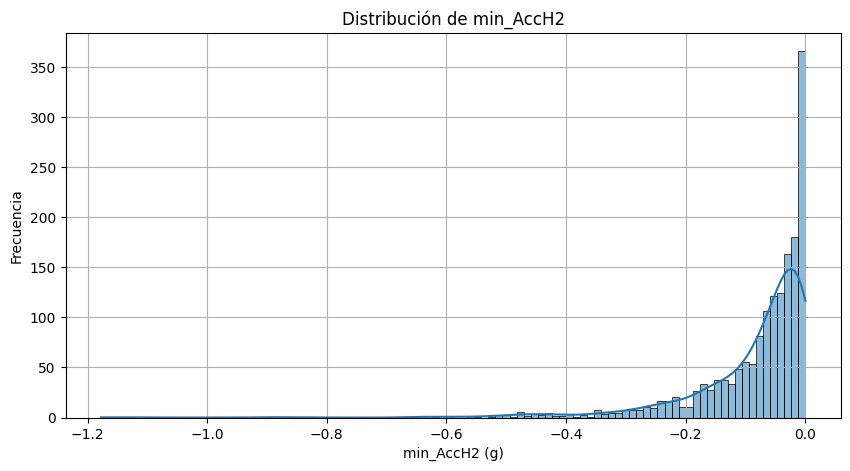

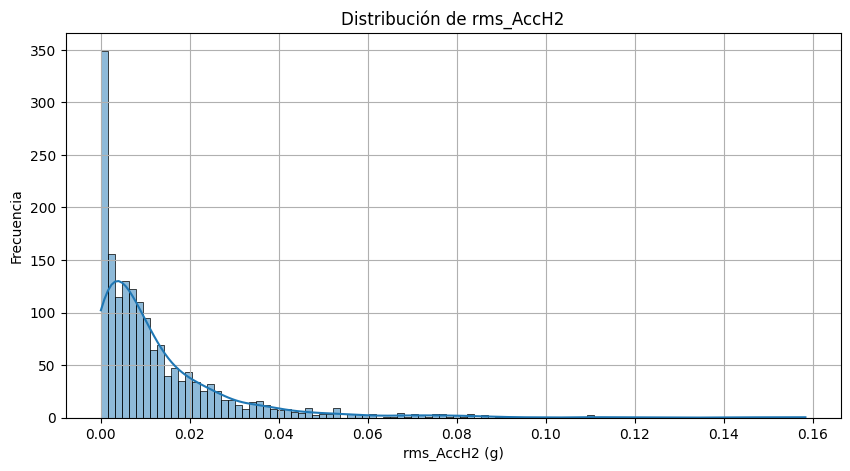

In [78]:
# ----------------------------------------------------------------------------------
# BLOQUE 22: Distribuciones de `AccH2`
# ----------------------------------------------------------------------------------
plot_distribution(df, 'max_AccH2')
plot_distribution(df, 'min_AccH2')
plot_distribution(df, 'rms_AccH2')

## Bloque 23 – Duración de los registros

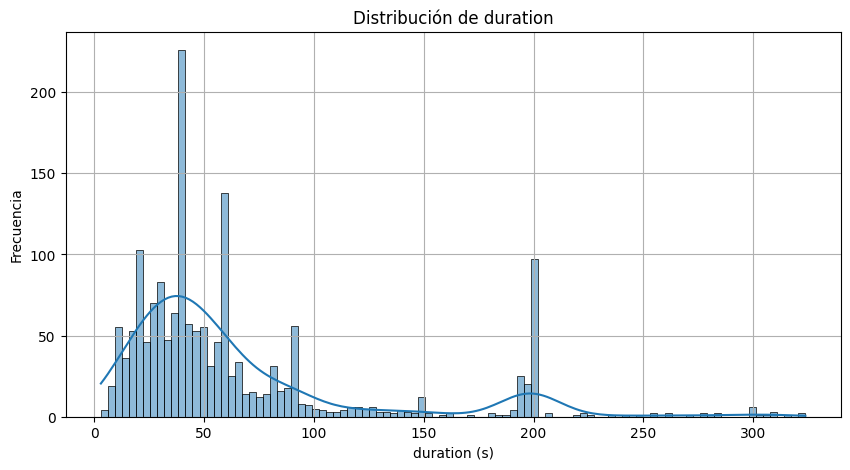

In [79]:
# ----------------------------------------------------------------------------------
# BLOQUE 23: Calculamos la duración real en segundos de cada registro
# ----------------------------------------------------------------------------------
df['duration'] = df['len_Time'] * 0.01
df['duration'].describe().T
plot_distribution(df, 'duration')

## Bloque 24 – Matriz de correlaciones

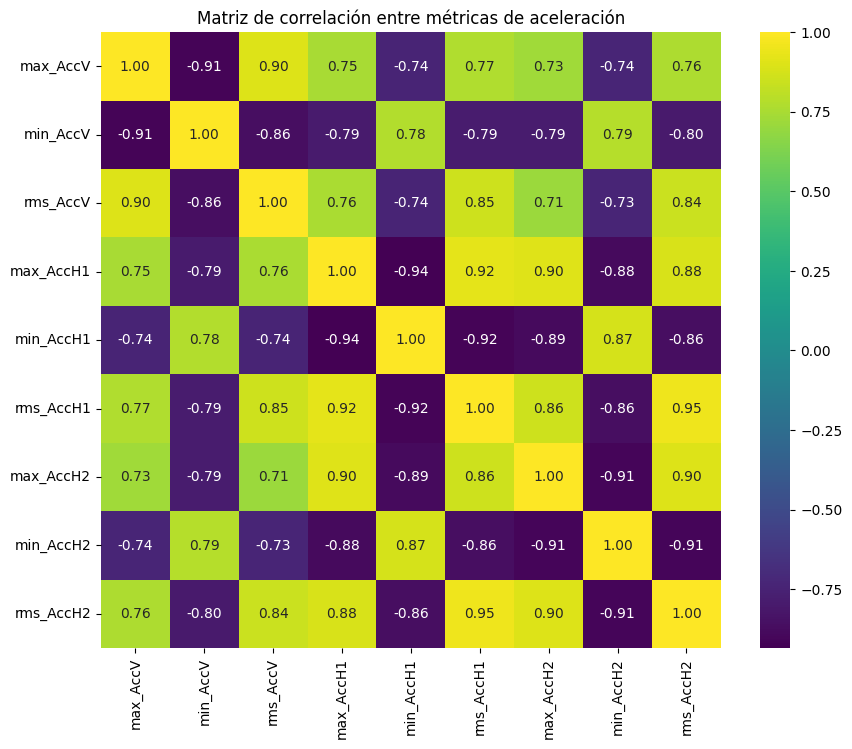

In [80]:
# ----------------------------------------------------------------------------------
# BLOQUE 24: Correlación entre características derivadas
# ----------------------------------------------------------------------------------
cols = ['max_AccV', 'min_AccV', 'rms_AccV',
        'max_AccH1', 'min_AccH1', 'rms_AccH1',
        'max_AccH2', 'min_AccH2', 'rms_AccH2']
corr = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de correlación entre métricas de aceleración")
plt.show()